In [2]:
import pandas as pd
import numpy as np


#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

In [3]:
df = pd.read_csv("data/owidcovidata.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
df[['new_cases_per_million', 
       'total_deaths_per_million', 'new_deaths_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million']].head(150000)

,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,480.346,1917.586,1.393,1.03,882.0,12.931,5960.0,87.381,NaN,NaN,5621.0,82.411
149996,475.405,1919.052,1.466,1.03,892.0,13.078,5988.0,87.791,NaN,NaN,5630.0,82.543
149997,427.419,1920.416,1.363,1.04,892.0,13.078,5885.0,86.281,NaN,NaN,5691.0,83.437
149998,387.643,1921.281,0.865,1.03,898.0,13.166,6046.0,88.642,NaN,NaN,5756.0,84.390


In [6]:
df[['total_boosters', 'total_boosters_per_hundred']].head(9900)

,total_boosters,total_boosters_per_hundred
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
9895,3196687.0,35.35
9896,3287562.0,36.35
9897,3338116.0,36.91
9898,3366553.0,37.23


In [7]:
df = df.drop(['new_deaths_smoothed', 'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',  'new_vaccinations_smoothed',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'], axis = 1)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,aged_65_older
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581


In [8]:
df.head(15)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,aged_65_older
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581


In [9]:
df.groupby(["location"]).describe().head(200)

total_cases                                               \
                    count          mean           std  min         25%   
location                                                                 
Afghanistan         709.0  7.492526e+04  5.588271e+04  5.0    37685.00   
Africa              719.0  3.962400e+06  3.285124e+06  1.0  1069907.00   
Albania             695.0  8.965496e+04  7.565238e+04  2.0     9329.50   
Algeria             708.0  1.061453e+05  7.491137e+04  1.0    40155.25   
Andorra             702.0  9.594061e+03  7.764436e+03  1.0     1060.00   
...                   ...           ...           ...  ...         ...   
Somalia             688.0  1.027769e+04  8.014726e+03  1.0     3326.50   
South Africa        699.0  1.476300e+06  1.113470e+06  1.0   616993.50   
South America       710.0  1.937754e+07  1.495675e+07  2.0  5420612.75   
South Korea         742.0  1.473733e+05  1.872459e+05  1.0    14156.25   
South Sudan         668.0  7.230985e+03  4.944179e+03  1.0     2633.75   

                                                   new_cases                \
                      50%          75%         max     count          mean   
location                                                                     
Afghanistan       55445.0    150458.00    163555.0     709.0    230.684062   
Africa          3670256.0   6924412.50  10877658.0     720.0  15082.044444   
Albania           97909.0    134624.00    258543.0     694.0    372.540346   
Algeria          110408.0    181624.00    253520.0     708.0    358.079096   
Andorra           10546.5     14863.75     35958.0     701.0     51.295292   
...                   ...          ...         ...       ...           ...   
Somalia            6246.0     16212.50     26067.0     688.0     37.888081   
South Africa    1496439.0   2550501.00   3608307.0     698.0   5142.866762   
South America  16752672.5  35937876.00  48875265.0     711.0  68565.945148   
South Korea       76677.5    199426.50    884310.0     741.0   1193.399460   
South Sudan        8470.5     11224.00     16810.0     668.0     25.164671   

               ... total_boosters_per_hundred        aged_65_older          \
               ...                        75%    max         count    mean   
location       ...                                                           
Afghanistan    ...                        NaN    NaN         709.0   2.581   
Africa         ...                     0.0700   0.19           0.0     NaN   
Albania        ...                     4.4150   7.04         708.0  13.188   
Algeria        ...                     0.0550   0.06         708.0   6.211   
Andorra        ...                    21.6550  31.97           0.0     NaN   
...            ...                        ...    ...           ...     ...   
Somalia        ...                        NaN    NaN         688.0   2.731   
South Africa   ...                     0.9375   0.99         726.0   5.344   
South America  ...                     4.2425  21.55           0.0     NaN   
South Korea    ...                     3.4125  53.13         742.0  13.914   
South Sudan    ...                        NaN    NaN         668.0   3.441   

                                                                     
                        std     min     25%     50%     75%     max  
location                                                             
Afghanistan    3.599662e-14   2.581   2.581   2.581   2.581   2.581  
Africa                  NaN     NaN     NaN     NaN     NaN     NaN  
Albania        8.888063e-14  13.188  13.188  13.188  13.188  13.188  
Algeria        7.910376e-14   6.211   6.211   6.211   6.211   6.211  
Andorra                 NaN     NaN     NaN     NaN     NaN     NaN  
...                     ...     ...     ...     ...     ...     ...  
Somalia        4.888535e-15   2.731   2.731   2.731   2.731   2.731  
South Africa   4.355075e-14   5.344   5.344   5.344   5.344   5.344  
South America        

In [10]:
df.groupby(["location"]).aggregate([min, max]).head()

iso_code           continent                date              \
                  min       max       min     max         min         max   
location                                                                    
Afghanistan       AFG       AFG      Asia    Asia  2020-02-24  2022-02-01   
Africa       OWID_AFR  OWID_AFR       NaN     NaN  2020-02-13  2022-02-01   
Albania           ALB       ALB    Europe  Europe  2020-02-25  2022-02-01   
Algeria           DZA       DZA    Africa  Africa  2020-02-25  2022-02-01   
Andorra           AND       AND    Europe  Europe  2020-03-02  2022-02-01   

            total_cases             new_cases           ...  \
                    min         max       min      max  ...   
location                                                ...   
Afghanistan         5.0    163555.0      -6.0   3243.0  ...   
Africa              1.0  10877658.0       0.0  60523.0  ...   
Albania             2.0    258543.0       0.0   4789.0  ...   
Algeria             1.0    253520.0       0.0   2521.0  ...   
Andorra             1.0     35958.0       0.0   2313.0  ...   

            total_vaccinations_per_hundred          \
                                       min     max   
location                                             
Afghanistan                           0.00   12.87   
Africa                                0.00   25.92   
Albania                               0.00   87.84   
Algeria                               0.00   29.08   
Andorra                               0.74  175.07   

            people_vaccinated_per_hundred         \
                                      min    max   
location                                           
Afghanistan                          0.00  11.43   
Africa                               0.00  16.07   
Albania                              0.00  42.12   
Algeria                              0.00  16.24   
Andorra                              0.74  74.52   

            people_fully_vaccinated_per_hundred         \
                                            min    max   
location                                                 
Afghanistan                                0.14   9.77   
Africa                                     0.00  10.88   
Albania                                    0.00  38.69   
Algeria                                    1.62  12.99   
Andorra                                    1.52  68.58   

            total_boosters_per_hundred        aged_65_older          
                                   min    max           min     max  
location                                                             
Afghanistan                        NaN    NaN         2.581   2.581  
Africa                            0.00   0.19           NaN     NaN  
Albania                           0.10   7.04        13.188  13.188  
Algeria                           0.03   0.06         6.211   6.211  
Andorra                          11.03  31.97           NaN     NaN  

[5 rows x 64 columns]

In [11]:
df.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,aged_65_older
total_cases,1.000000,0.773973,0.792946,0.979464,0.731393,0.104576,0.031085,0.127926,0.017879,0.777368,...,0.825706,0.850852,0.817575,0.616430,0.787830,0.070005,0.071390,0.036502,-0.110330,0.028943
new_cases,0.773973,1.000000,0.976182,0.711250,0.661091,0.094268,0.092668,0.089888,0.034776,0.651903,...,0.581728,0.569822,0.580868,0.775054,0.495072,0.071441,0.050395,0.046870,0.042639,0.032579
new_cases_smoothed,0.792946,0.976182,1.000000,0.728546,0.666443,0.095633,0.081389,0.091388,0.032396,0.706031,...,0.589520,0.578194,0.587247,0.780631,0.499034,0.067936,0.046505,0.042023,0.038771,0.033121
total_deaths,0.979464,0.711250,0.728546,1.000000,0.773617,0.082594,0.014408,0.148172,0.023347,0.793854,...,0.795200,0.821119,0.784475,0.530021,0.785414,0.049307,0.054162,0.016003,-0.148035,0.026113
new_deaths,0.731393,0.661091,0.666443,0.773617,1.000000,0.019600,0.014367,0.069965,0.076119,0.859826,...,0.484636,0.502033,0.453007,0.278746,0.626781,-0.085644,-0.100968,-0.119013,-0.162707,0.027763
total_cases_per_million,0.104576,0.094268,0.095633,0.082594,0.019600,1.000000,0.442879,0.755177,0.229549,0.126146,...,-0.065960,-0.058321,-0.050539,-0.002104,-0.134740,0.532657,0.506345,0.514678,0.562933,0.352080
new_cases_per_million,0.031085,0.092668,0.081389,0.014408,0.014367,0.442879,1.000000,0.226636,0.298218,0.073341,...,-0.029722,-0.031101,-0.024372,0.032908,-0.060981,0.283452,0.226240,0.254396,0.488408,0.204099
total_deaths_per_million,0.127926,0.089888,0.091388,0.148172,0.069965,0.755177,0.226636,1.000000,0.283184,0.197647,...,-0.046953,-0.037107,-0.034758,-0.014249,-0.104186,0.260846,0.298256,0.256461,0.111038,0.370670
new_deaths_per_million,0.017879,0.034776,0.032396,0.023347,0.076119,0.229549,0.298218,0.283184,1.000000,0.206008,...,-0.056900,-0.052831,-0.057821,-0.026210,-0.069315,-0.093901,-0.091376,-0.107541,0.009455,0.226690
icu_patients,0.777368,0.651903,0.706031,0.793854,0.859826,0.126146,0.073341,0.197647,0.206008,1.000000,...,0.645951,0.660654,0.627253,0.558762,0.530742,-0.055598,-0.054170,-0.065920,-0.011874,-0.027439


<AxesSubplot:>

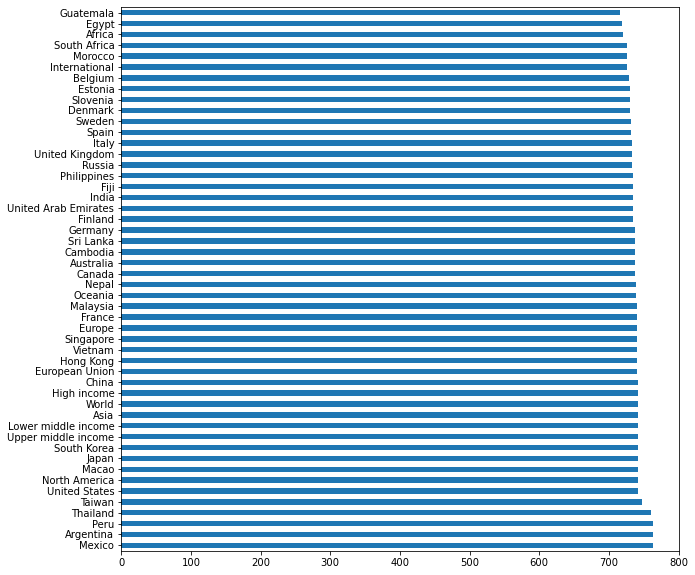

In [12]:
plt.figure(figsize=(10,10))
df['location'].value_counts().head(50).plot(kind='barh')

In [13]:
df.columns 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'total_boosters', 'new_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'total_boosters_per_hundred', 'aged_65_older'],
      dtype='object')

In [14]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,aged_65_older
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.581


In [15]:
df.shape

(158857, 33)

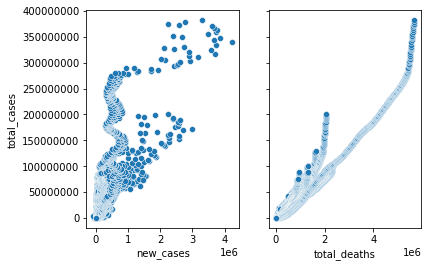

In [16]:


fig, axes = plt.subplots(nrows = 1, ncols = 2, sharey=True, figsize=(6, 4))

#Now that we have an empty grid of plots we can fill in plots
ax0 = sns.scatterplot(x="new_cases", y="total_cases",data=df, ax=axes[0] )
ax1 = sns.scatterplot(x="total_deaths", y="total_cases",data=df, ax=axes[1] )
plt.ticklabel_format(style='plain', axis='y')

#style.use('fivethirtyeight')

#plt.savefig('funding_for_startup_companies.png') hue="location", dddd

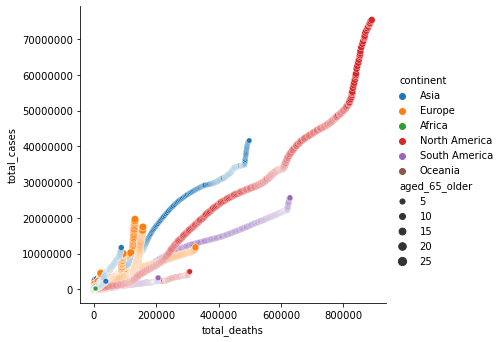

In [17]:
sns.relplot(x="total_deaths", y="total_cases",data=df, kind="scatter", hue = "continent", size = "aged_65_older")
plt.ticklabel_format(style='plain', axis='y')

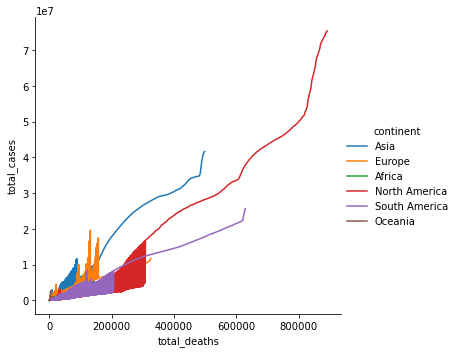

In [18]:
sns.relplot(x="total_deaths", y="total_cases",data=df, kind="line", hue = "continent")

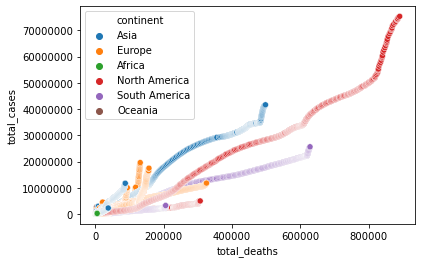

In [19]:
sns.scatterplot(x="total_deaths", y="total_cases",data=df, hue = "continent")
plt.ticklabel_format(style='plain', axis='y')

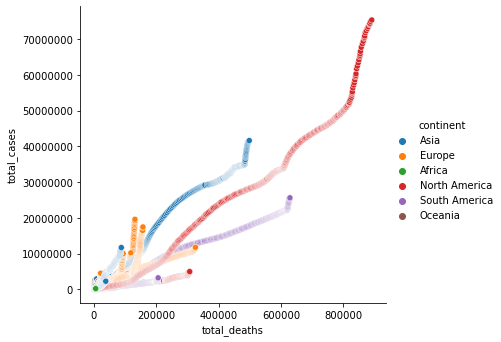

In [20]:
fg = sns.relplot(x="total_deaths", y="total_cases",data=df, hue = "continent")
plt.ticklabel_format(style='plain', axis='y')

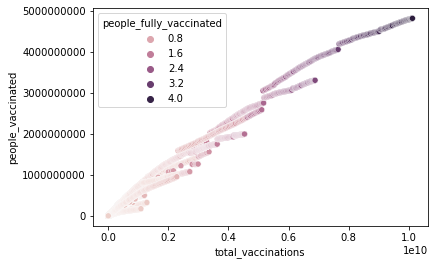

In [21]:
sns.scatterplot('total_vaccinations', y= 'people_vaccinated',data=df, hue='people_fully_vaccinated',)
plt.ticklabel_format(style='plain', axis='y')

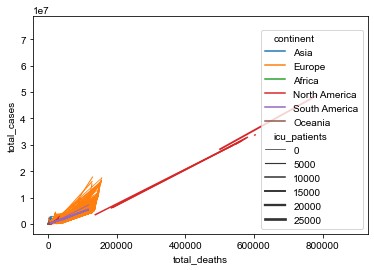

In [22]:
sns.lineplot(x="total_deaths", y="total_cases",data=df, hue = "continent", size = "icu_patients")
sns.set_theme(style="darkgrid")

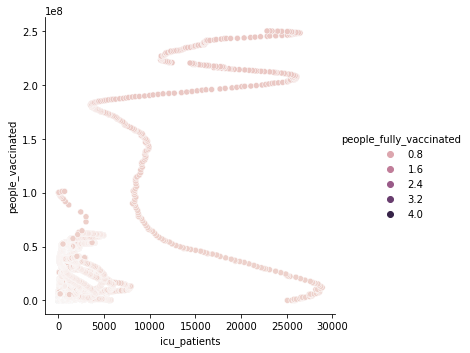

In [40]:
sns.relplot('icu_patients', y= 'people_vaccinated',data=df, hue='people_fully_vaccinated',kind = "scatter")
